# Bar Charts

###Column Bar Charts


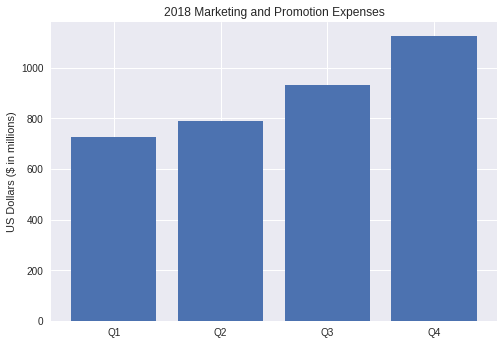

In [0]:
import matplotlib.pyplot as plt; 
import numpy as np
 
objects = ('Q1', 'Q2', 'Q3', 'Q4') # Create a tuple include four seasons.

y_pos = np.arange(len(objects)) # create a np array with four elements.
performance = [727,788,930,1125] # a tuple include marketing expenses
 
''' Plot a bar chart'''
plt.bar(y_pos, performance, align='center') 
plt.xticks(y_pos, objects)
plt.ylabel('US Dollars ($ in millions)')
plt.title('2018 Marketing and Promotion Expenses')
plt.savefig('column_bar_chart.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'US Dollars ($ in millions)')

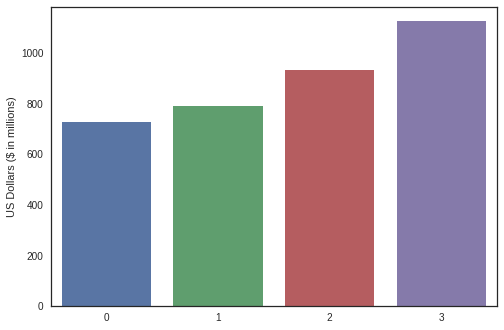

In [0]:
import seaborn as sns
%matplotlib inline 
sns.set(style="white")


ax = sns.barplot(x=y_pos, y=performance)
ax.set_ylabel("US Dollars ($ in millions)")

In [0]:
# Make an dataset for example
import pandas as pd
season = ["Q1", "Q2", "Q3", "Q4"]
expense = [727, 788, 930 , 1125]
column_barchart_df = pd.DataFrame(
    {'season': season,
     'expense': expense
    })


# plot the dataset, referencing dataframe column names
import altair as alt
bars = alt.Chart(column_barchart_df).mark_bar().encode(
  x='season',
  y='expense',
  color='season'
)

text = bars.mark_text(
    align='left',
    dx=-9,
    dy=-5
).encode(
    text='expense'
)

bars + text

LayerChart({
  layer: [Chart({
    data:    expense season
    0      727     Q1
    1      788     Q2
    2      930     Q3
    3     1125     Q4,
    encoding: EncodingWithFacet({
      color: Color({
        shorthand: 'season'
      }),
      x: X({
        shorthand: 'season'
      }),
      y: Y({
        shorthand: 'expense'
      })
    }),
    mark: 'bar'
  }), Chart({
    data:    expense season
    0      727     Q1
    1      788     Q2
    2      930     Q3
    3     1125     Q4,
    encoding: EncodingWithFacet({
      color: Color({
        shorthand: 'season'
      }),
      text: Text({
        shorthand: 'expense'
      }),
      x: X({
        shorthand: 'season'
      }),
      y: Y({
        shorthand: 'expense'
      })
    }),
    mark: MarkDef({
      align: 'left',
      dx: -9,
      dy: -5,
      type: 'text'
    })
  })]
})

### Group Bar Chart

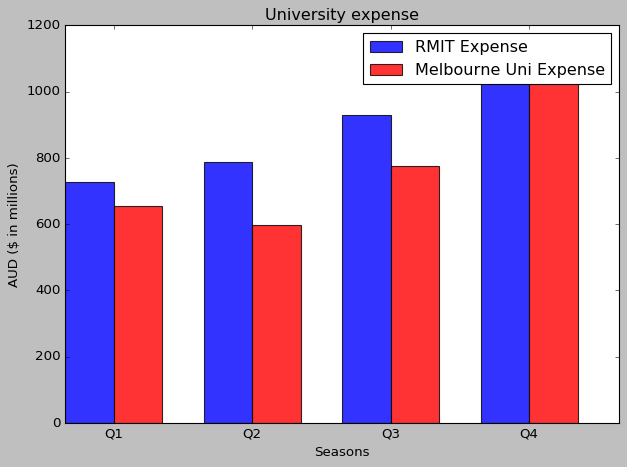

In [0]:
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('classic')
# data to plot
n_groups = 4
means_RMIT = (727, 788, 930 , 1125)
means_UoM = (654, 598, 777, 1025)

 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8



#  matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', 
#  data=None, **kwargs)
rects1 = plt.bar(index, means_RMIT, bar_width,
                 alpha=opacity,
                 color='b',
                 label='RMIT Expense')
 
rects2 = plt.bar(index + bar_width, means_UoM, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Melbourne Uni Expense')
 
plt.xlabel('Seasons')
plt.ylabel('AUD ($ in millions)')
plt.title('University expense')
plt.xticks(index + bar_width, ('Q1', 'Q2', 'Q3', 'Q4'))
plt.legend()
 
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


NameError: ignored

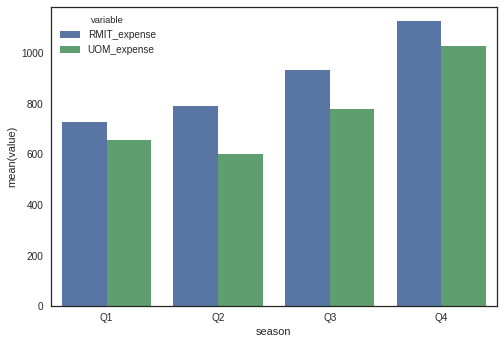

In [0]:
import pandas as pd
import seaborn as sns
sns.set(style="white")

season = ["Q1", "Q2", "Q3", "Q4"]
RMIT_expense = [727, 788, 930 , 1125]
UOM_expense = [654, 598, 777, 1025]
grouped_barchart_df = pd.DataFrame(
    {'season': season,
     'RMIT_expense': RMIT_expense,
     'UOM_expense': UOM_expense
    })

grouped_barchart_df = pd.melt(grouped_barchart_df, id_vars=['season']).sort_values(['variable','value'])
sns.barplot(x='season', y='value', hue='variable', data=grouped_barchart_df)
plt.ylabel('University expense')
plt.legend(loc='upper left');
plt.title('RMIT Expense vs UOM Expense');

In [0]:
import altair as alt


alt.Chart(grouped_barchart_df).mark_bar().encode(
    alt.Column('season'),
    alt.X('variable', scale=alt.Scale(rangeStep=64), axis=alt.Axis(title='')),
    alt.Y('value', axis=alt.Axis(title='population', grid=False)),
    color=alt.Color('variable', scale=alt.Scale(range=["#EA98D2", "#659CCA"])),
).configure_view(
    stroke='transparent'
).configure_axis(
    domainWidth=0.8
)

Chart({
  config: Config({
    axis: AxisConfig({
      domainWidth: 0.8
    }),
    view: ViewConfig({
      stroke: 'transparent'
    })
  }),
  data:   season      variable  value
  0     Q1  RMIT_expense    727
  1     Q2  RMIT_expense    788
  2     Q3  RMIT_expense    930
  3     Q4  RMIT_expense   1125
  5     Q2   UOM_expense    598
  4     Q1   UOM_expense    654
  6     Q3   UOM_expense    777
  7     Q4   UOM_expense   1025,
  encoding: EncodingWithFacet({
    color: Color({
      scale: Scale({
        range: ['#EA98D2', '#659CCA']
      }),
      shorthand: 'variable'
    }),
    column: Column({
      shorthand: 'season'
    }),
    x: X({
      axis: Axis({
        title: ''
      }),
      scale: Scale({
        rangeStep: 64
      }),
      shorthand: 'variable'
    }),
    y: Y({
      axis: Axis({
        grid: False,
        title: 'population'
      }),
      shorthand: 'value'
    })
  }),
  mark: 'bar'
})

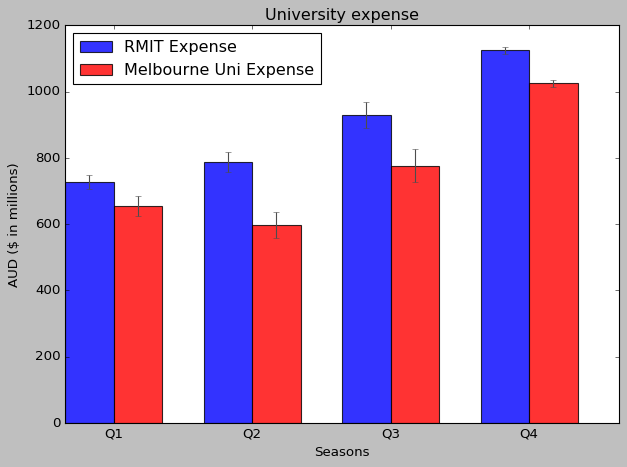

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


plt.style.use('classic')
# data to plot
n_groups = 4
means_RMIT = (727, 788, 930, 1125)
var_RMIT = (20, 30, 40, 10)

means_UoM = (654, 598, 777, 1025)
var_UoM = (30, 40, 50, 10)

 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)

bar_width = 0.35
opacity = 0.8

error_config = {'ecolor': '0.3'}


#  matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', 
#  data=None, **kwargs)
rects1 = plt.bar(index, means_RMIT, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=var_RMIT, 
                 error_kw=error_config,
                 label='RMIT Expense')
 
rects2 = plt.bar(index + bar_width, means_UoM, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=var_UoM, 
                 error_kw=error_config,
                 label='Melbourne Uni Expense')
 
plt.xlabel('Seasons')
plt.ylabel('AUD ($ in millions)')
plt.title('University expense')
#ax.set_xticks(index + bar_width, ('Q1', 'Q2', 'Q3', 'Q4'))
plt.xticks(index + bar_width, ('Q1', 'Q2', 'Q3', 'Q4'))
plt.legend(loc='upper left');
 
plt.tight_layout()
plt.show()

### Stacked Bar Chart

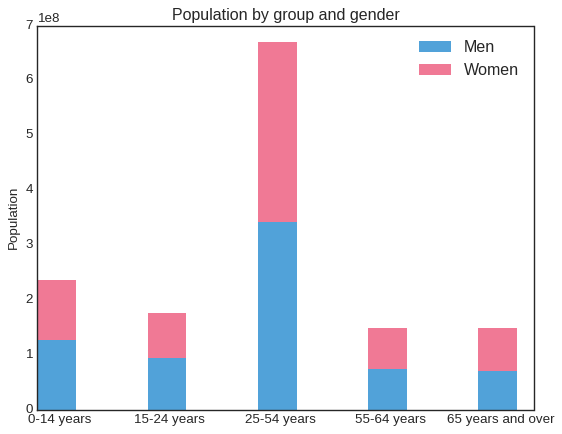

In [0]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

N = 5
male_pop = (127484177, 94215607, 341466438, 74771050, 71103029)
female_pop = (109113241, 82050623, 327661460, 73441177, 77995969)



ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, male_pop, width, color='#51A2D9', linewidth=0)
p2 = plt.bar(ind, female_pop, width, bottom=male_pop,  color='#F07995', linewidth=0)

plt.ylabel('Population')
plt.title('Population by group and gender')
plt.xticks(ind+0.2, ('0-14 years', '15-24 years', '25-54 years', '55-64 years', '65 years and over'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [0]:
print(plt.style.available)

['seaborn-pastel', 'classic', 'seaborn-ticks', 'ggplot', 'seaborn-poster', 'seaborn-notebook', 'Solarize_Light2', 'seaborn-muted', 'seaborn-white', 'seaborn-whitegrid', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'fivethirtyeight', 'seaborn-dark', 'seaborn', 'seaborn-deep', 'bmh', 'fast', '_classic_test', 'seaborn-talk', 'seaborn-paper', 'seaborn-darkgrid', 'grayscale', 'dark_background']


#### Area 

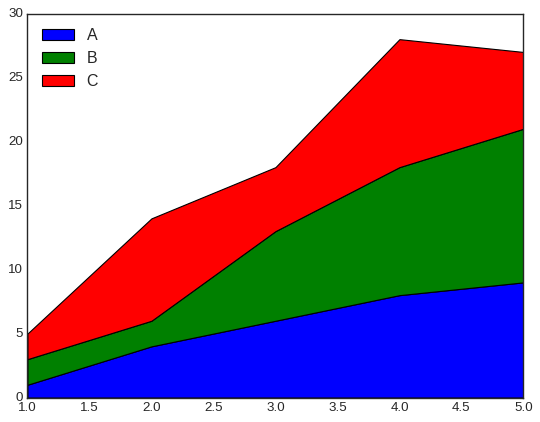

In [0]:
# library
import numpy as np
import matplotlib.pyplot as plt
 
# --- FORMAT 1
 
# Your x and y axis
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
 
# Basic stacked area chart.
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
plt.show()
 
# # --- FORMAT 2</pre>
# x=range(1,6)
# y1=[1,4,6,8,9]
# y2=[2,2,7,10,12]
# y3=[2,8,5,10,6]
 
# # Basic stacked area chart.
# plt.stackplot(x,y1, y2, y3, labels=['A','B','C'])
# plt.legend(loc='upper left')


#### Nested Pie Chart

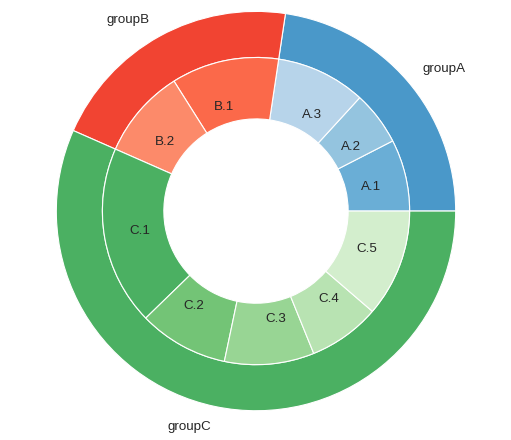

In [0]:
# Libraries
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 7 subgroups
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()


#### Scattergram

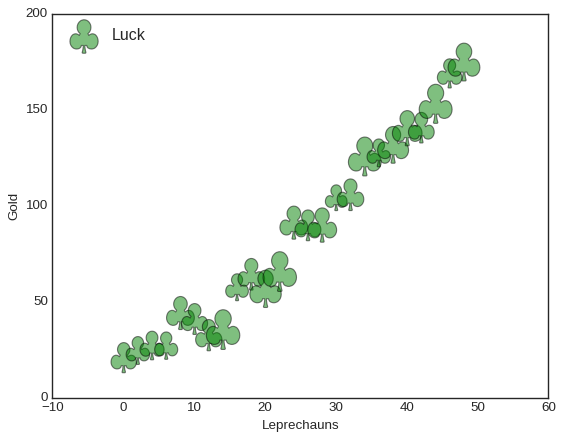

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")
plt.xlabel("Leprechauns")
plt.ylabel("Gold")
plt.legend(loc='upper left')
plt.show()

#### Radar Graph


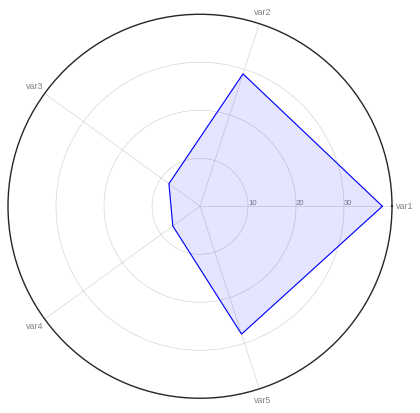

In [0]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)


#### Line Graph

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:3261: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:3261: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:3261: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


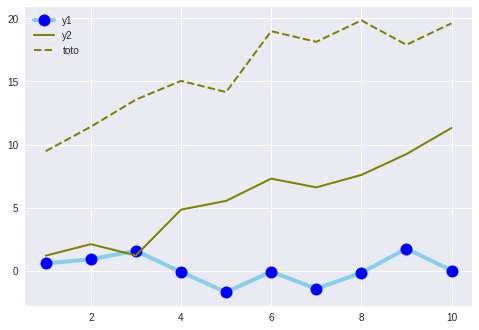

In [1]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()